Define a basic ANN structure in TensorFlow using Keras APIs

In [1]:
from tensorflow.keras.models import Sequential
model = Sequential()

2025-09-17 18:32:38.904801: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-17 18:32:38.919668: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-17 18:32:39.021623: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-17 18:32:39.109075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758105159.187380    5170 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758105159.20

In [2]:
from tensorflow.keras.layers import Dense

model.add(Dense(512, activation = 'relu', input_shape = (784,)))   
model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1758105162.179126    5170 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1758105162.179733    5170 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,019 (2.04 MB)

 Trainable params: 534,019 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Classification of hand written digits using Neural Network


Load MNIST database

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check the shape of input and output variables

In [5]:
print("shape of training data ",X_train.shape)
print("shape of training labels ",y_train.shape)
print("shape of training data ",X_test.shape)
print("shape of training labels ",y_test.shape)
print("type of X_train ",type(X_train))
print("type of y_train",type(y_train))

shape of training data  (60000, 28, 28)
shape of training labels  (60000,)
shape of training data  (10000, 28, 28)
shape of training labels  (10000,)
type of X_train  <class 'numpy.ndarray'>
type of y_train <class 'numpy.ndarray'>


Plot sample images

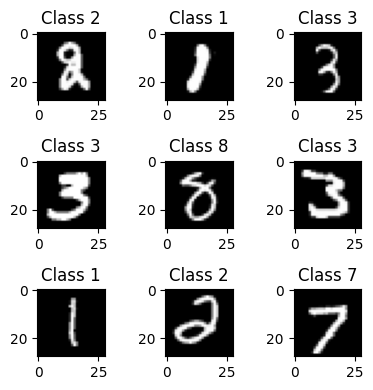

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
plt.rcParams['figure.figsize'] = (4,4)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [7]:
from numpy import random

from PIL import Image

for i in range(10):
    num = random.randint(0, len(X_train))
    im = Image.fromarray(X_train[num])
    im.save('sample' +str(i+1)+'.jpg')

Pre-processing of the data

In [8]:
#reshape the input
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784) 

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize the input
X_test /= 255

Converting the class labels into one hot vector

In [9]:
from tensorflow.keras.utils import to_categorical
num_class = 10
print("label of 100th instance in training data: ", y_train[100])
print("label of 500th instance in test data: ", y_test[500])

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

print("label of 100th instance in training data one hot encoded: ",y_train[100])
print("label of 500th instance in test data one hot encoded: ",y_test[500])

label of 100th instance in training data:  5
label of 500th instance in test data:  3
label of 100th instance in training data one hot encoded:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
label of 500th instance in test data one hot encoded:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Define a simple feedforward neural network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))   
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

Train the network

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8782 - loss: 0.4264
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0912
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9823 - loss: 0.0564
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0364
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0257
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0.0194
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0160
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0173
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9963 - loss: 0.0112


Evaluate on test set

In [14]:
score = model.evaluate(X_test, y_test)
print('loss on test data: ', score[0])
print('accuracy on test data:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9769 - loss: 0.0917
loss on test data:  0.07547129690647125
accuracy on test data: 0.9804999828338623


Implement a CNN on MNIST


load th dataset

In [15]:
#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize the input
X_test /= 255

X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

Define the CNN 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()      
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_class, activation="softmax"))

/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Train the CNN

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7736 - loss: 0.7207
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9654 - loss: 0.1126
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9757 - loss: 0.0787
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9790 - loss: 0.0691
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9825 - loss: 0.0577
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9845 - loss: 0.0508
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9847 - loss: 0.0503
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9847 - loss: 0.0467
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9867 - loss: 0.0415
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9878 - loss: 0.0389


Plot the training performance

Text(0, 0.5, 'accuracy')

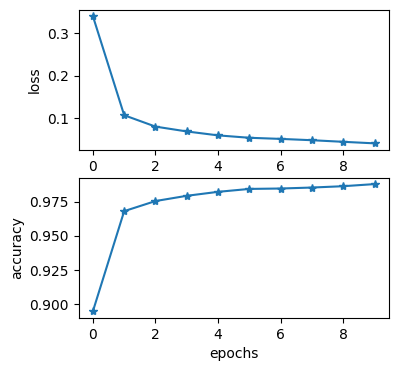

In [21]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['loss'], '*-')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'*-')
plt.xlabel('epochs')
plt.ylabel('accuracy')

Evaluate on test set

In [22]:
score = model.evaluate(X_test, y_test)
print('loss on test data: ', score[0])
print('accuracy on test data:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9888 - loss: 0.0322
loss on test data:  0.026364346966147423
accuracy on test data: 0.9907000064849854


Save model as keras type

In [23]:
model.save('baseline_model.keras')

Save model as tflite type

In [24]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_no_quant_tflite = converter.convert()


import pathlib

tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(model_no_quant_tflite)

INFO:tensorflow:Assets written to: /tmp/tmp0k_s9xnp/assets


INFO:tensorflow:Assets written to: /tmp/tmp0k_s9xnp/assets


Saved artifact at '/tmp/tmp0k_s9xnp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136447293114672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136447088743120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446621639328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446621631056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446622096144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446622092976: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1758105215.202590    5170 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1758105215.202617    5170 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-09-17 18:33:35.202855: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp0k_s9xnp
2025-09-17 18:33:35.203147: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-17 18:33:35.203152: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp0k_s9xnp
I0000 00:00:1758105215.205374    5170 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-09-17 18:33:35.205840: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-17 18:33:35.222057: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp0k_s9xnp
2025-09-17 18:33:35.226740: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

142332

In [25]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)

optimization = tf.lite.Optimize.DEFAULT
converter.optimizations = [optimization]
tflite_model = converter.convert()

import pathlib

tflite_models_dir = pathlib.Path("./tflite_models_qt/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbbylww63/assets


INFO:tensorflow:Assets written to: /tmp/tmpbbylww63/assets


Saved artifact at '/tmp/tmpbbylww63'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136447293114672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136447088743120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446621639328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446621631056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446622096144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136446622092976: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1758105215.469546    5170 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1758105215.469559    5170 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-09-17 18:33:35.469682: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpbbylww63
2025-09-17 18:33:35.469959: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-17 18:33:35.469964: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpbbylww63
2025-09-17 18:33:35.472063: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-17 18:33:35.486211: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpbbylww63
2025-09-17 18:33:35.490834: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 21153 microseconds.


39920

In [26]:
tflite_model_file = 'tflite_models/model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

Im = Image.open('sample1.jpg')
Im_resized = Im.resize((28, 28))
Im = np.asarray(Im_resized)

Im = Im/255

input_data = np.array(Im, dtype=np.float32)

input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
prediction = interpreter.get_tensor(output_index)
prediction = np.argmax(prediction)


print(prediction)

1


/home/cacc/anaconda3/envs/ml/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


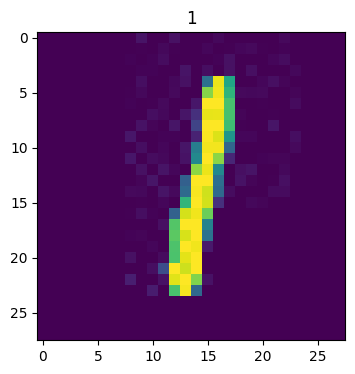

In [27]:
Im = Image.open('sample1.jpg')
plt.imshow(Im)


plt.title(prediction)
#plt.axis('off')
plt.show()

In [28]:
#Use optimization

In [29]:
tflite_model_file = 'tflite_models_qt/model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

Im = Image.open('sample2.jpg')
Im_resized = Im.resize((28, 28))
Im = np.asarray(Im_resized)

Im = Im/255

input_data = np.array(Im, dtype=np.float32)

input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
prediction = interpreter.get_tensor(output_index)
prediction = np.argmax(prediction)


print(prediction)

6


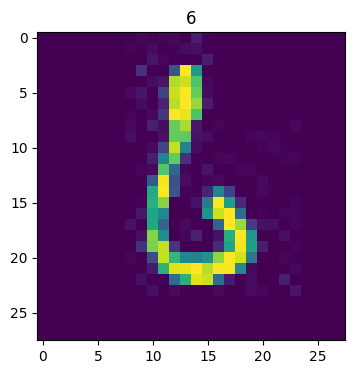

In [30]:
Im = Image.open('sample2.jpg')
plt.imshow(Im)


plt.title(prediction)
#plt.axis('off')
plt.show()